This home assignment consists of several parts.
You are supposed to make some transformations, train the model, estimate its quality and comment on your results.
This task foreshadows the forthcoming large task on ML pipeline and should help you get ready for it.

Several comments:

* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.

## Data preprocessing, model training and evaluation

### 1. Reading the data
Today we work with the [wine dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset), describing several wine types for multiclass ($k=3$) classification problem.
The data is available from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) library.

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
random_state = 42

In [11]:
features = pd.DataFrame(load_wine(return_X_y=False)['data'],
                        columns=load_wine(return_X_y=False)['feature_names'])

target = load_wine(return_X_y=False)['target']

features.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Let's select *30%* of the data for testing set.

In [13]:
# make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

### 2. Machine Learning Pipeline

Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations in several sentences: do you need the transformation at all and if so, what transform should you applly and why? In case you decide to apply specific pre-processing, remember the selected transformations to re-use them in the necessary Pipeline.

We need to apply normalization to our data because they have different dimensions. I used StandardScaler.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std.shape, X_test_std.shape

((124, 13), (54, 13))

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with [`f1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) (macro-averaged) and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [15]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#! pip install scikit-plot

Fitting 5 folds for each of 100 candidates, totalling 500 fits
f1: 0.9803756658256239, accuracy: 0.9814814814814815


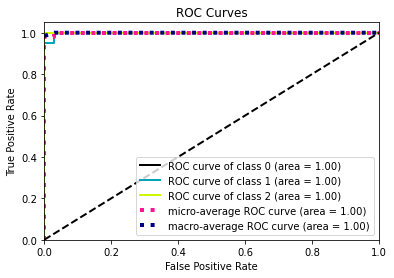

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import scikitplot
param_grid_lr = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0.1, 10, num=50)
}
grid_lr = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), param_grid_lr, cv=5, verbose=1)
grid_lr.fit(X_train_std, y_train);
lr = grid_lr.best_estimator_
y_pred = lr.predict(X_test_std)
y_pred_proba = lr.predict_proba(X_test_std)
print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

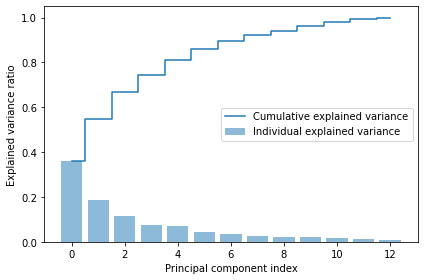

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* Visualize your data in 2D using another `PCA(num_components=2)` model and `.transform()` method

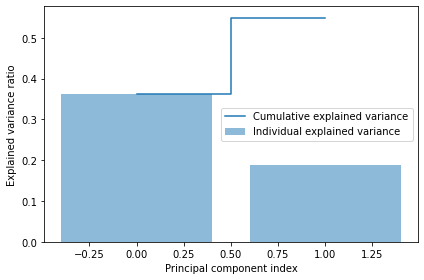

In [18]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

I use n_components=10 because it's enough for good explaining of the data.

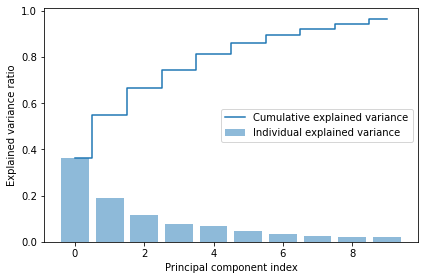

In [19]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.4. Logistic regression on (PCA-)preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` (macro-averaged) and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Fitting 5 folds for each of 100 candidates, totalling 500 fits
f1: 1.0, accuracy: 1.0


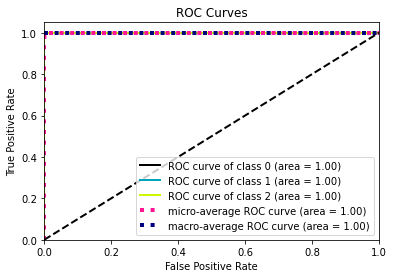

In [20]:
param_grid_lr = {
    'penalty' : ['l1', 'l2'],
    'C' : np.linspace(0.1, 10, num=50)
}
grid_lr = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), param_grid_lr, cv=5, verbose=1)
grid_lr.fit(X_train_pca, y_train);
lr = grid_lr.best_estimator_
y_pred = lr.predict(X_test_pca)
y_pred_proba = lr.predict_proba(X_test_pca)
print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.5. Evaluate resulting model performance on the testing set

* Use the model with the optimal hyperparamteres, fitted to the whole `train` set.
* Estimate resulting `f1` (macro-averaged) and `accuracy` scores for the `test` set from block 1.

f1: 0.9803756658256239, accuracy: 0.9814814814814815


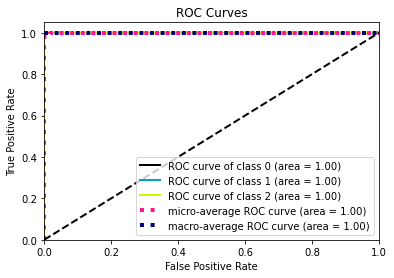

In [21]:
lr = LogisticRegression(multi_class='multinomial',
                        solver='saga',
                        tol=1e-3,
                        max_iter=500,
                        C=grid_lr.best_params_['C'],
                        penalty=grid_lr.best_params_['penalty'])
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
y_pred_proba = lr.predict_proba(X_test_std)
print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.show()